In [16]:
import pandas as pd

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('../data/candy.csv')

In [18]:
df.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [19]:
X = df.drop('competitorname', axis = 1)

kmeans = KMeans(n_clusters= 4).fit(X)
print('Total de centros: ', len(kmeans.cluster_centers_))

Total de centros:  4


In [20]:
print(kmeans.predict(X))

[1 1 0 2 2 2 1 0 0 0 0 0 0 2 0 2 0 2 1 0 2 2 1 1 1 1 0 1 3 2 0 2 3 1 2 1 3
 1 1 2 1 1 3 1 0 0 2 3 0 2 0 3 3 3 3 0 1 0 2 0 1 1 0 2 3 1 1 2 1 0 0 0 0 1
 2 2 2 2 2 3 2 0 2 2 2]


In [21]:
df['group'] = kmeans.predict(X)

df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,group
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,2
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,2
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,0
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,2
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,2


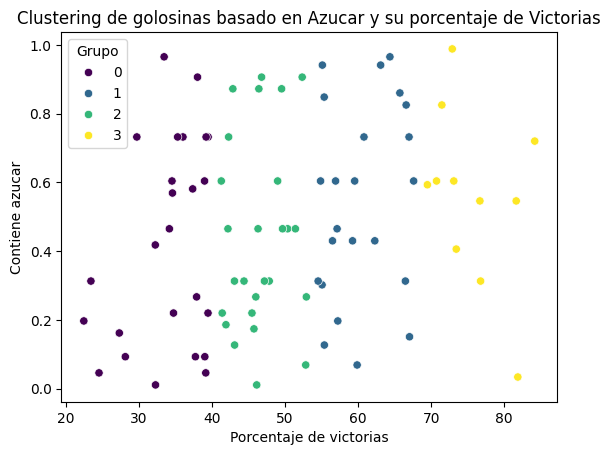

In [27]:
# Gráfico de dispersión para dos características
sns.scatterplot(x='winpercent',y='sugarpercent', hue='group', data=df, palette='viridis')
plt.title('Clustering de golosinas basado en Azucar y su porcentaje de Victorias')
plt.xlabel('Porcentaje de victorias')
plt.ylabel('Contiene azucar')
plt.legend(title='Grupo')
plt.show()

In [38]:
X = df.drop(['competitorname','winpercent'], axis = 1)

kmeans = MiniBatchKMeans(n_clusters= 4, batch_size= 50).fit(X)
print('Total de centros: ', len(kmeans.cluster_centers_))

Total de centros:  4


In [39]:
df['group'] = kmeans.predict(X)

df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,group
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,3
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,3
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,2
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,2
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,2
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,0
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,2
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0


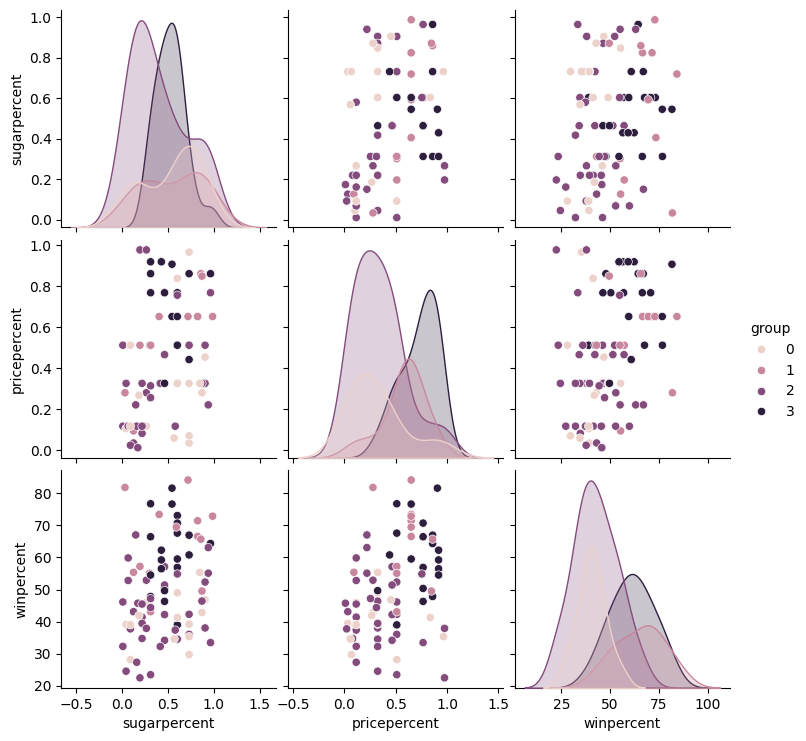

In [44]:
sns.pairplot(df[['sugarpercent', 'pricepercent', 'winpercent', 'group']], hue='group')

In [46]:
X['cluster'] = kmeans.predict(X)

In [47]:
X.head(3)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,group,cluster
0,1,0,1,0,0,1,0,1,0,0.732,0.860,3,3
1,1,0,0,0,1,0,0,1,0,0.604,0.511,3,3
2,0,0,0,0,0,0,0,0,0,0.011,0.116,0,2


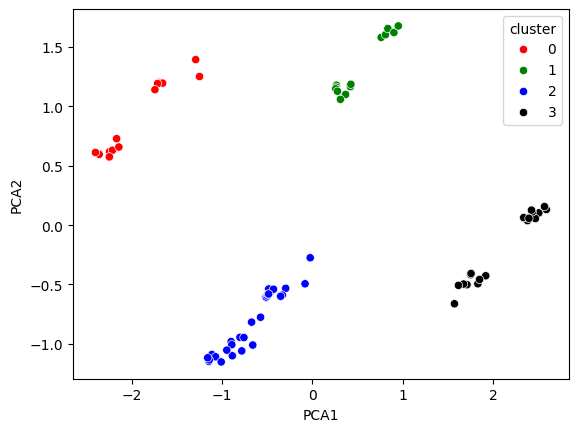

In [50]:
from sklearn.decomposition import PCA

model_PCA = PCA(n_components=2) # instanciamos el modelo 
data_PCA = model_PCA.fit_transform(X) # realizamos tranformacion
df_PCA = pd.DataFrame(data= data_PCA, columns= ["PCA1","PCA2"])
df_PCA = pd.concat([df_PCA, X['cluster']], axis=1)

x = sns.scatterplot(
    x = "PCA1", 
    y = "PCA2", 
    hue = "cluster", 
    data = df_PCA, 
    palette = ["red", "green", "blue", "black"]
)
plt.show()